In [1]:
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x_train = torch.tensor(np.arange(0, 100, 0.5), dtype=torch.float32).view(-1, 1)
y_train = torch.tensor([i * 25 + np.random.randint(-200, 200) for i in x_train], dtype=torch.float32).view(-1, 1)

In [3]:

class LinearRegressor(nn.Module):
    def __init__(self):
        super(LinearRegressor, self).__init__()
        self.linear = nn.Linear(1, 1)
    
    def forward(self, x):
        return self.linear(x)


regressor = LinearRegressor()
print(list(regressor.parameters()))

print("forward:", regressor(x_train[3]))

[Parameter containing:
tensor([[-0.0858]], requires_grad=True), Parameter containing:
tensor([-0.8922], requires_grad=True)]
forward: tensor([-1.0208], grad_fn=<AddBackward0>)


In [4]:

dataset = TensorDataset(x_train, y_train)
dataloader = DataLoader(dataset, batch_size=10, shuffle=True)


model = LinearRegressor()
criterion = nn.MSELoss()
optimizer = torch.optim.AdamW(params=model.parameters(), lr=0.2)


In [5]:
model.train()

losses = []

for epoch in range(0, 101):
    e_loss = 0
    for i, batch in enumerate(dataloader):
        model.zero_grad()
        
        logits = model(batch[0])
        loss = criterion(logits, batch[1])
        e_loss += loss.item()
        loss.backward()
        
        optimizer.step()
    
    losses.append(e_loss)
    if epoch % 20 == 0: print(f"Epoch: {epoch} | Loss: {e_loss}")

Epoch: 0 | Loss: 33572536.375
Epoch: 20 | Loss: 556240.83984375
Epoch: 40 | Loss: 398586.5927734375
Epoch: 60 | Loss: 337297.58984375
Epoch: 80 | Loss: 311478.302734375
Epoch: 100 | Loss: 300509.00732421875


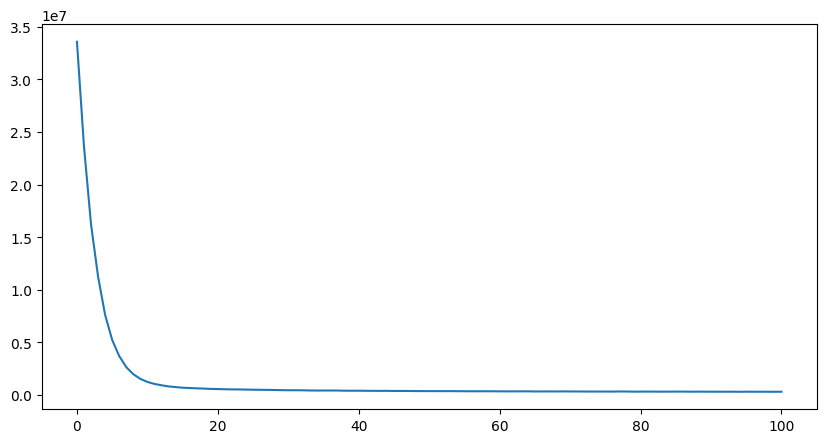

In [6]:
plt.figure(figsize=(10,5))
plt.plot(losses)

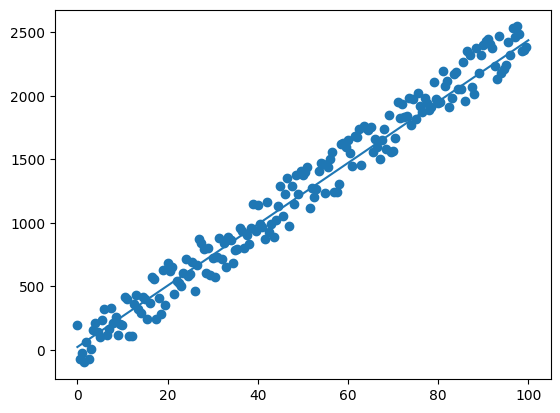

In [7]:
test_x = torch.tensor(np.arange(0, 100, 0.01), dtype=torch.float32).view(-1, 1)
test_y = model(test_x).detach().numpy()

plt.plot(test_x.numpy(), test_y)
plt.scatter(x_train.numpy(), y_train.numpy())